In [1]:
# Analyse the perfomances between players from different countries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
original_data = pd.read_csv("vnl.csv")
original_data

,player,country,age,attack,block,serve,set,dig,receive,position
0,Vargas,TUR,24,20.25,1.62,1.50,0.00,7.75,0.00,OP
1,Koga,JPN,28,17.67,0.78,1.11,0.00,11.22,1.11,OH
2,Van Ryk,CAN,25,16.44,0.89,1.11,0.00,12.56,0.11,OH
3,Li Y.Y.,CHN,24,16.33,0.56,1.00,0.00,8.22,3.56,OH
4,Gray,CAN,30,15.22,0.44,1.00,0.00,9.44,5.56,OH
...,...,...,...,...,...,...,...,...,...,...
262,Rodriguez,DOM,24,0.00,0.00,0.00,0.11,5.22,1.67,L
263,Reesink,NED,26,0.00,0.00,0.00,0.00,9.33,3.33,L
264,Pušić,SRB,31,0.00,0.00,0.00,0.00,5.75,2.12,L
265,Jost,CAN,24,0.00,0.00,0.00,0.00,5.33,1.11,L


In [33]:
print(original_data.isnull().sum())

player      0
country     0
age         0
attack      0
block       0
serve       0
set         0
dig         0
receive     0
position    0
dtype: int64


In [5]:
stat_cols = ["attack","block","serve","set","dig","receive"]
per_country = original_data.groupby("country")[stat_cols].mean()
per_country

,attack,block,serve,set,dig,receive
country,,,,,,
BRA,3.685882,0.890588,0.297059,0.926471,3.095294,1.019412
BUL,2.930000,0.413750,0.390000,1.040000,3.096875,0.883125
CAN,3.641429,0.547143,0.404286,1.571429,3.927857,0.841429
CHN,4.261538,0.656923,0.360000,1.957692,3.925385,1.223077
DOM,3.687857,0.586429,0.291429,1.031429,3.902143,0.900000
FRA,2.321667,0.440556,0.241111,0.833333,2.567778,1.322778
GER,3.396875,0.486875,0.408750,1.916250,3.240000,1.145000
ITA,3.346316,0.727895,0.432105,1.504211,3.011579,1.000000
JPN,3.816000,0.414667,0.289333,2.173333,4.158667,1.206667


In [17]:
def get_countries(original_data):
    country_list = []
    for i in original_data["country"]:
        if i not in country_list:
            country_list.append(i)

    return(country_list)
countries_list = get_countries(original_data)
print(countries_list)

['TUR', 'JPN', 'CAN', 'CHN', 'ITA', 'POL', 'BRA', 'DOM', 'BUL', 'USA', 'THA', 'SRB', 'KOR', 'NED', 'GER', 'FRA']


In [41]:
def get_stat_columns(original_data):
    stat_cols = original_data.select_dtypes(include='number').columns
    
    stat_list = []
    
    for col in stat_cols:
        if col not in stat_list:
            stat_list.append(col)
    del stat_list[0]
    
    return stat_list

# call this function with any DataFrame
stat_list = get_stat_columns(original_data)
print(stat_list)

['attack', 'block', 'serve', 'set', 'dig', 'receive']


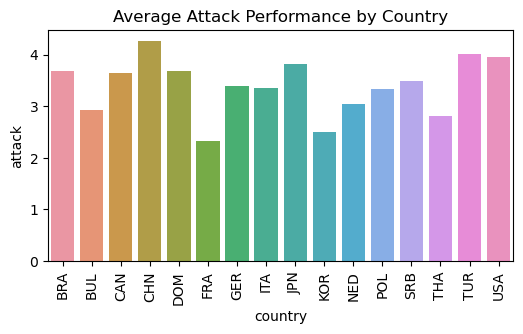

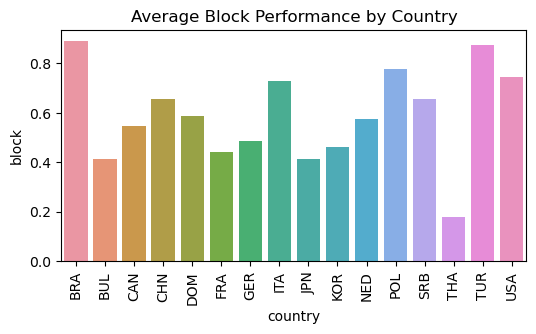

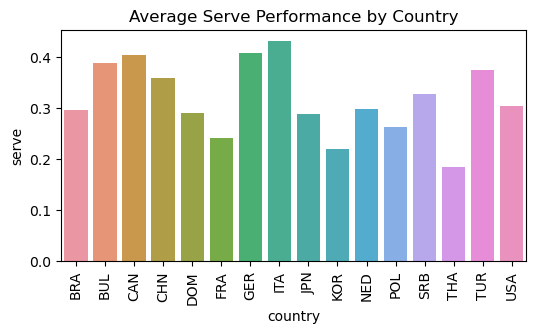

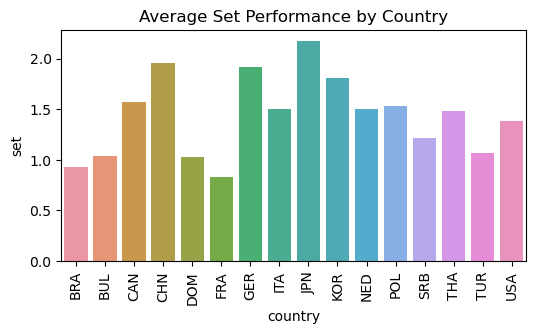

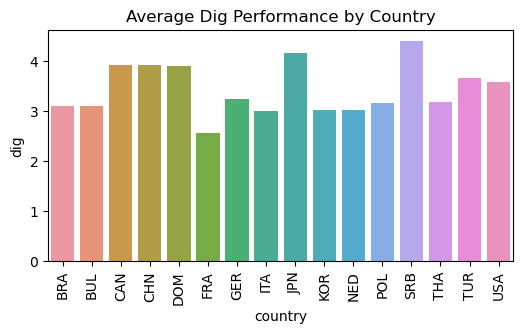

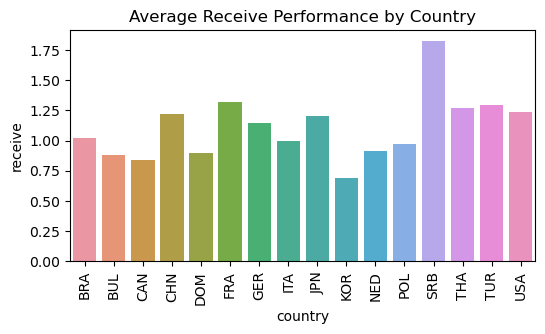

In [42]:
# mean performances
stat_list = get_stat_columns(original_data)

for stat in stat_list:
    
    plt.figure(figsize=(6, 3))

    sns.barplot(x=per_country.index, y=stat, data=per_country)
    plt.xticks(rotation=90)
    plt.title(f'Average {stat.capitalize()} Performance by Country')
    plt.show()

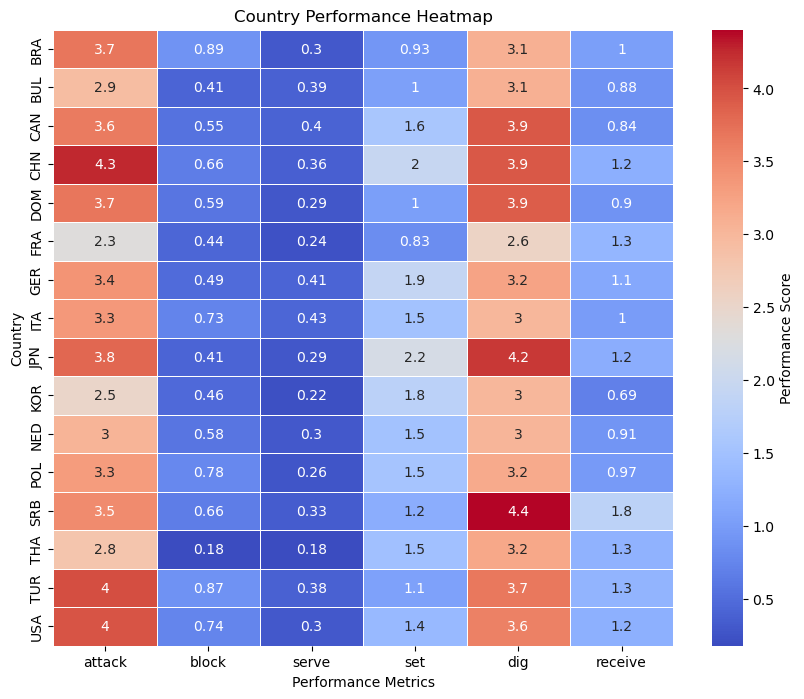

In [43]:
# heat map for all perfomance
plt.figure(figsize=(10, 8))

heatmap = sns.heatmap(per_country, annot=True, cmap='coolwarm', linewidths=0.5, cbar=True)

# label
cbar = heatmap.collections[0].colorbar
cbar.set_label('Performance Score')

plt.title('Country Performance Heatmap')
plt.xlabel('Performance Metrics')
plt.ylabel('Country')

plt.show()

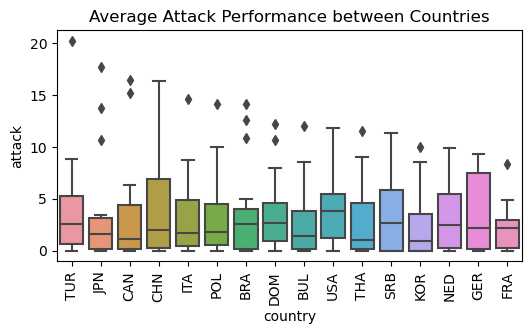

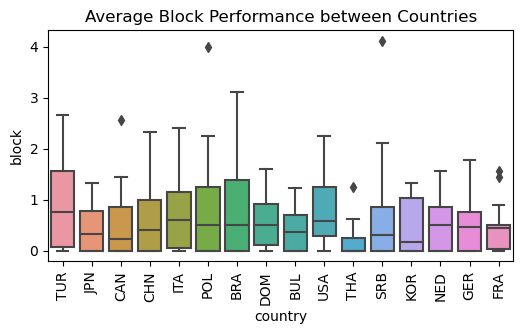

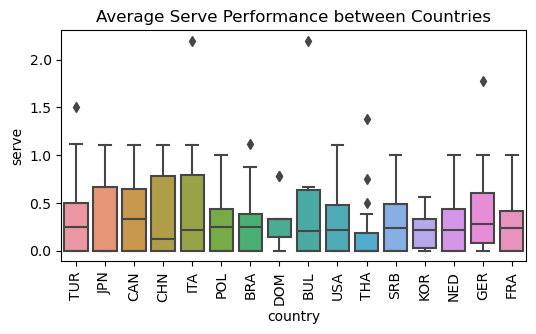

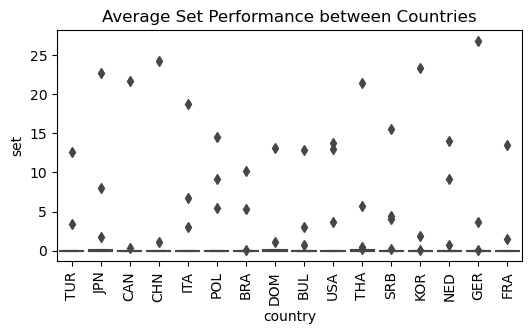

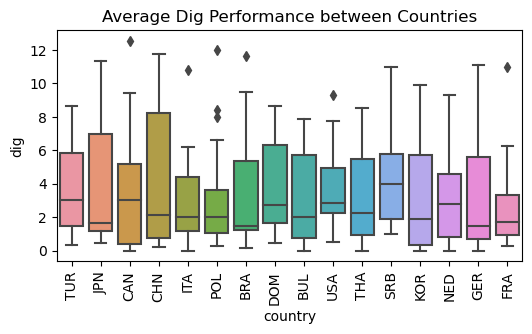

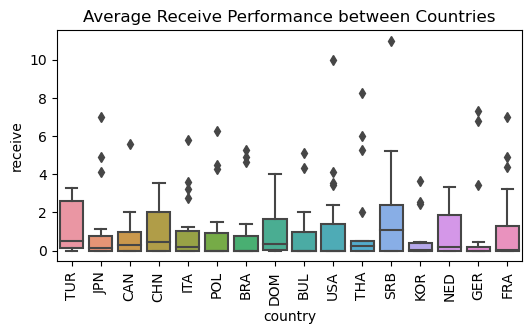

In [44]:
countries_list = get_countries(original_data)
stat_list = get_stat_columns(original_data)

for stat in stat_list:

    plt.figure(figsize=(6, 3))
    sns.boxplot(x='country', y=stat, data=original_data)
    plt.xticks(rotation=90)
    plt.title(f'Average {stat.capitalize()} Performance between Countries')
    plt.show()

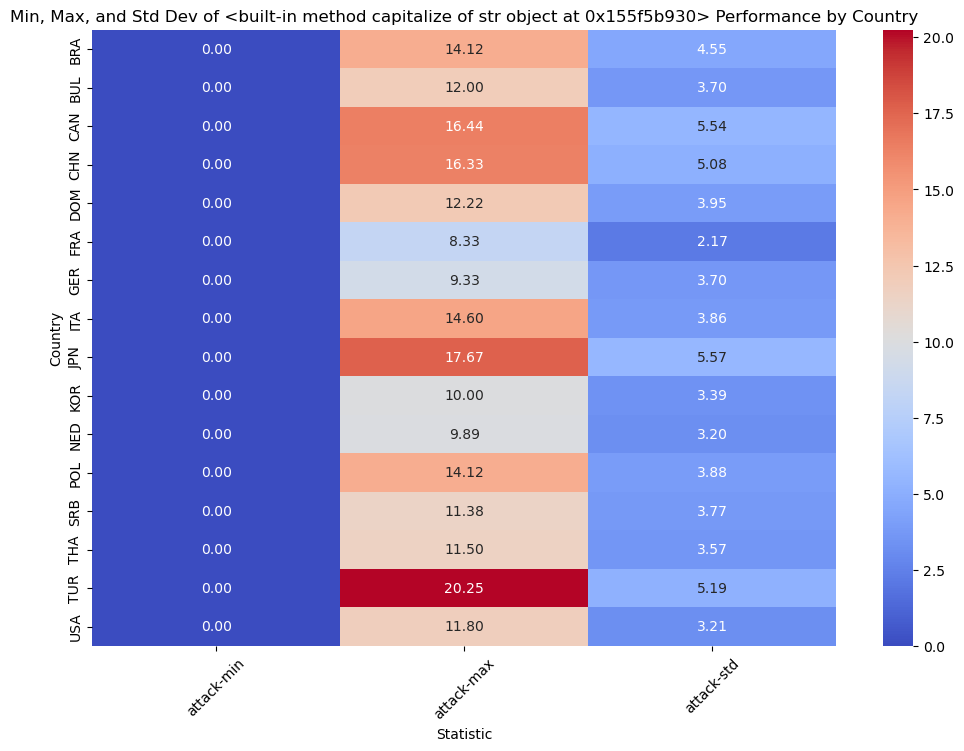

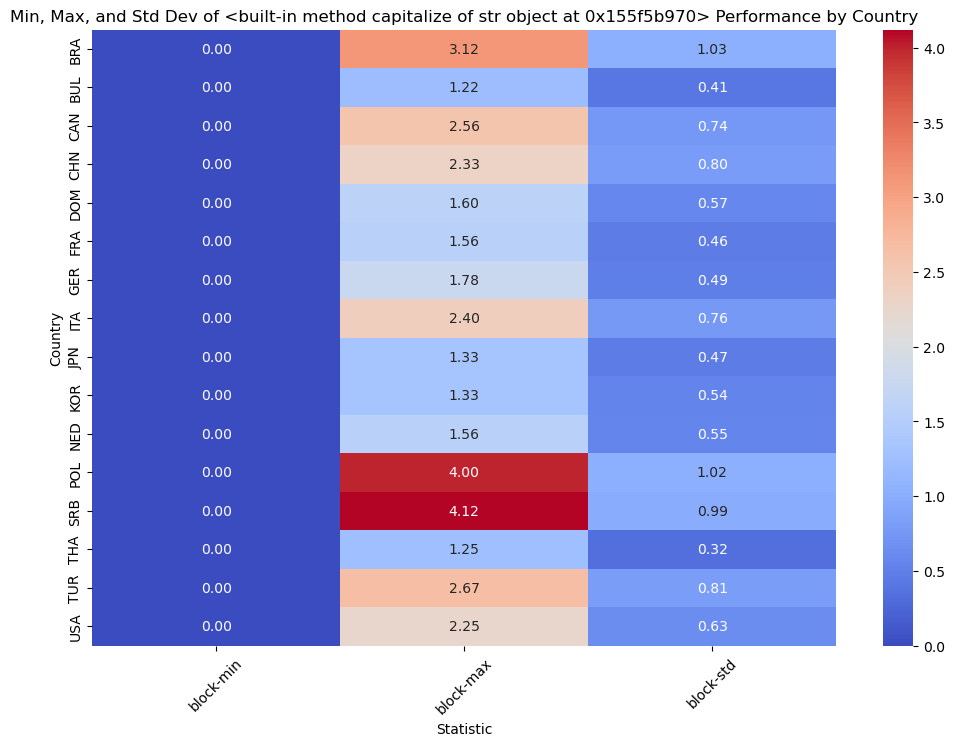

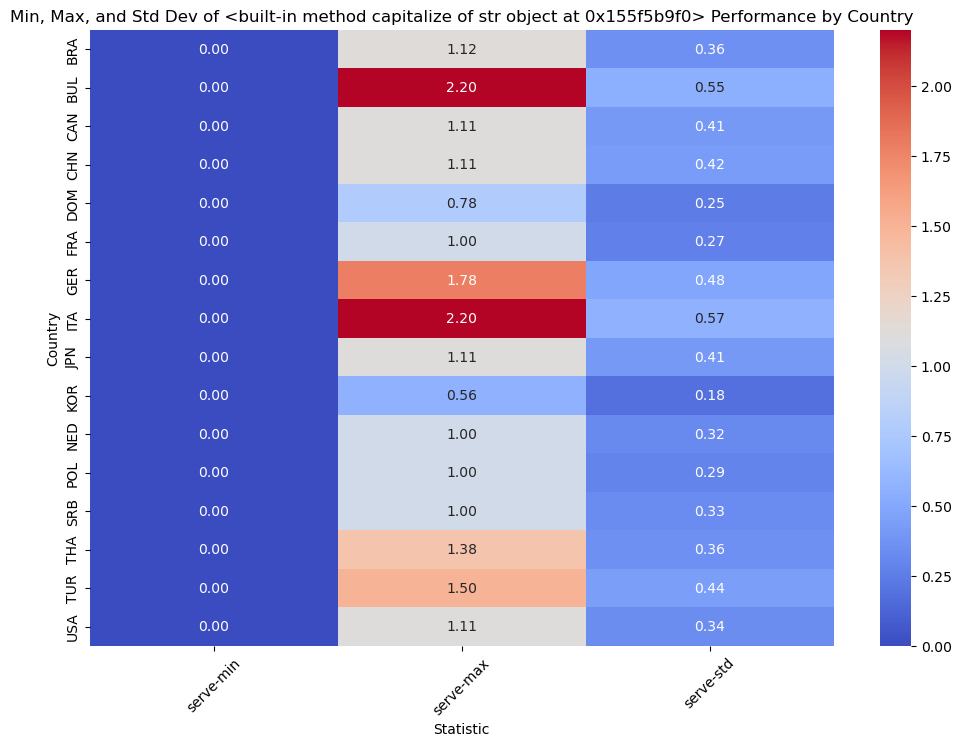

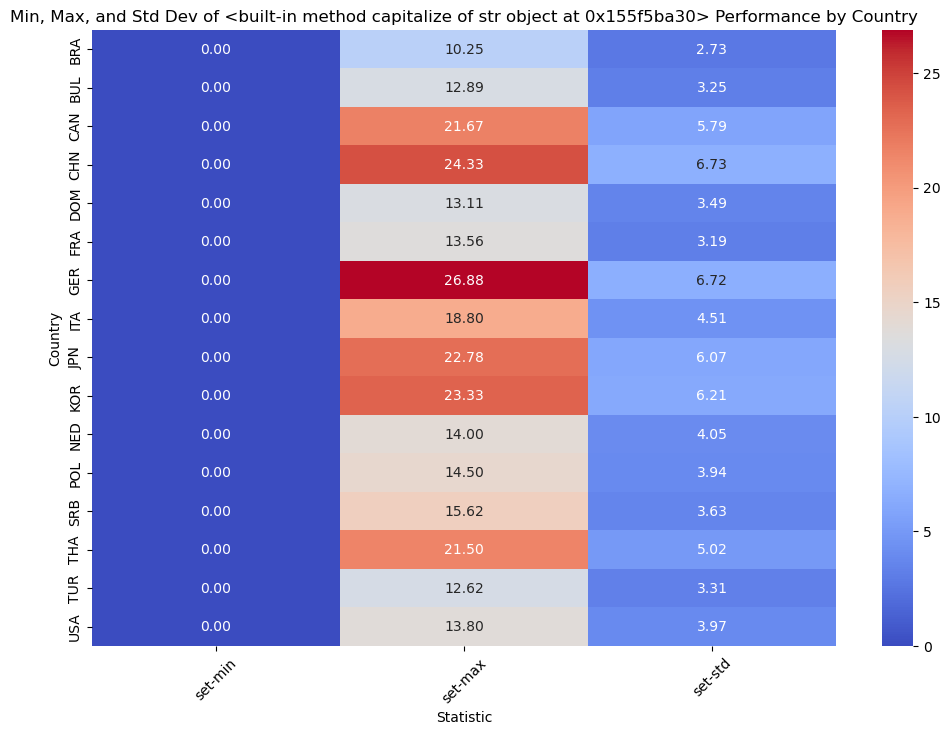

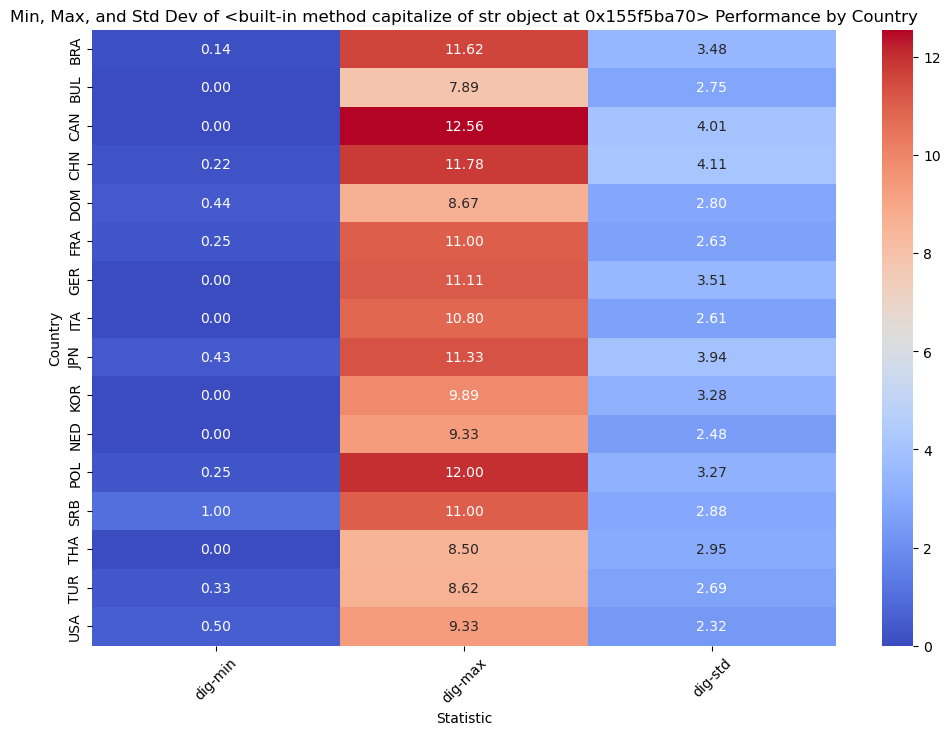

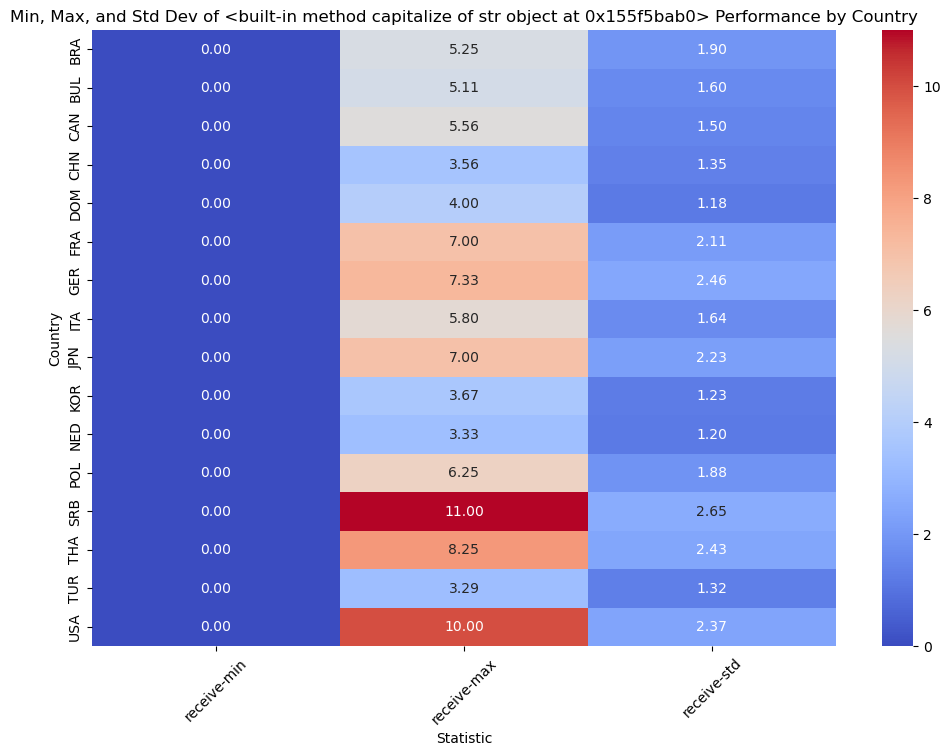

In [46]:
# extremes per country

stat_list = get_stat_columns(original_data)

for stat in stat_list:
    plt.figure(figsize=(12, 8))

    heatmap_data = country_performance_stats[[(stat, 'min'), (stat, 'max'), (stat, 'std')]]


    sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".2f")
    plt.title(f'Min, Max, and Std Dev of {stat.capitalize} Performance by Country')
    plt.xlabel('Statistic')
    plt.ylabel('Country')
    plt.xticks(rotation=45)
    plt.show()
